In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_excel('/Users/didyvanbelkom/Documents/02 MSc DSS/THESIS CODE/Jupiter Notebook/online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.00000,10.33767,107.42411,-9600.00000,1.00000,3.00000,10.00000,19152.00000
Price,525461.00000,4.68883,146.12691,-53594.36000,1.25000,2.10000,4.21000,25111.09000
Customer ID,417534.00000,15360.64548,1680.81132,12346.00000,13983.00000,15311.00000,16799.00000,18287.00000


In [6]:
'Creating a new variable called TotalPrice to find the total income per invoice'

df["TotalPrice"] = df["Quantity"] * df["Price"]

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000


In [8]:
'Check for missing observations'
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
TotalPrice          0
dtype: int64

In [9]:
df.dropna(inplace=True) #erases incomplete observations.

df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407664.00000,13.58559,96.84075,1.00000,2.00000,5.00000,12.00000,19152.00000
Price,407664.00000,3.29444,34.75796,0.00100,1.25000,1.95000,3.75000,10953.50000
Customer ID,407664.00000,15368.59260,1679.76214,12346.00000,13997.00000,15321.00000,16812.00000,18287.00000
TotalPrice,407664.00000,21.66491,77.15006,0.00100,4.95000,11.90000,19.50000,15818.40000


# Segmentation

In [11]:
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [12]:
today_date = dt.datetime(2011, 12, 11)


rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00000,530,11,372.86000
12347.00000,368,2,1323.32000
12348.00000,439,1,222.16000
12349.00000,408,3,2671.14000
12351.00000,376,1,300.93000


In [13]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [14]:
rfm_scaled = (rfm-rfm.min())/(rfm.max()-rfm.min())

In [15]:
rfm_scaled.head()

,recency,frequency,monetary
Customer ID,,,
12346.00000,0.43968,0.04902,0.00106
12347.00000,0.00536,0.00490,0.00378
12348.00000,0.19571,0.00000,0.00063
12349.00000,0.11260,0.00980,0.00764
12351.00000,0.02681,0.00000,0.00085


In [44]:
rfm_scaled.describe()

,recency,frequency,monetary
count,4312.00000,4312.00000,4312.00000
mean,0.24175,0.01694,0.00586
std,0.25968,0.04005,0.02553
min,0.00000,0.00000,0.00000
25%,0.04558,0.00000,0.00087
50%,0.13941,0.00490,0.00201
75%,0.36193,0.01961,0.00493
max,1.00000,1.00000,1.00000


Text(0.5, 0, 'Monetary')

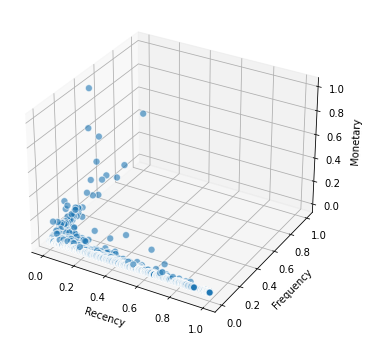

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = rfm_scaled['recency']
ys = rfm_scaled['frequency']
zs = rfm_scaled['monetary']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Creating binary classifier "Top 10% spender"

The goal is to predict whether a customer will be a top 10% spend customer predicted based on the RFM scores and the clusters they are in. First we import the second year data as "df_y2".

In [17]:
import pandas as pd
df_y2 = pd.read_excel('/Users/didyvanbelkom/Documents/02 MSc DSS/THESIS CODE/Jupiter Notebook/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df_y2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


In [18]:
df_y2.dropna(inplace=True) #erases incomplete observations.

df_y2 = df_y2[~df_y2["Invoice"].str.contains("C", na=False)]
df_y2 = df_y2[(df_y2['Quantity'] > 0)]
df_y2 = df_y2[(df_y2['Price'] > 0)]

df_y2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


In [19]:
df_y2["TotalPrice"] = df_y2["Quantity"] * df_y2["Price"]

In [20]:
df_y2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


In [21]:
test = df_y2.groupby("Customer ID")["TotalPrice"].sum().reset_index()
test.head()

,Customer ID,TotalPrice
0,12346.00000,77183.60000
1,12347.00000,4310.00000
2,12348.00000,1797.24000
3,12349.00000,1757.55000
4,12350.00000,334.40000


In [22]:
test2 = test.sort_values(by='TotalPrice',ascending=False)
test2.head(10)

,Customer ID,TotalPrice
1689,14646.00000,280206.02000
4201,18102.00000,259657.30000
3728,17450.00000,194550.79000
3008,16446.00000,168472.50000
1879,14911.00000,143825.06000
55,12415.00000,124914.53000
1333,14156.00000,117379.63000
3771,17511.00000,91062.38000
2702,16029.00000,81024.84000
0,12346.00000,77183.60000


In [23]:
test2.describe()

,Customer ID,TotalPrice
count,4338.00000,4338.00000
mean,15300.40802,2054.27061
std,1721.80849,8989.22990
min,12346.00000,3.75000
25%,13813.25000,307.41500
50%,15299.50000,674.48500
75%,16778.75000,1661.74000
max,18287.00000,280206.02000


Now we create a binary variable with 0 = no and 1 = yes for whether or not a customer is in the top 10% spend category. Testing if the top values got a "Yes" as value:

In [24]:
test2["Top 10% spend"] = pd.cut(test2.TotalPrice,bins=[3.74,3649.100000,280206.020000],labels=[0,1]).astype(int)
test2.head()

,Customer ID,TotalPrice,Top 10% spend
1689,14646.00000,280206.02000,1
4201,18102.00000,259657.30000,1
3728,17450.00000,194550.79000,1
3008,16446.00000,168472.50000,1
1879,14911.00000,143825.06000,1


Cheking if the lowest values have gotten a "No" as value:

In [25]:
test2.tail()

,Customer ID,TotalPrice,Top 10% spend
3323,16878.00000,13.30000,0
4098,17956.00000,12.75000,0
3014,16454.00000,6.90000,0
1793,14792.00000,6.20000,0
3217,16738.00000,3.75000,0


Now, we create the final dataframe by combining the RFM value frame with the column 'Top 10% spend'

In [26]:
df_complete = pd.merge(left=rfm_scaled, right=test2, left_on='Customer ID', right_on='Customer ID')
df_complete.head()

,Customer ID,recency,frequency,monetary,TotalPrice,Top 10% spend
0,12346.00000,0.43968,0.04902,0.00106,77183.60000,1
1,12347.00000,0.00536,0.00490,0.00378,4310.00000,1
2,12348.00000,0.19571,0.00000,0.00063,1797.24000,0
3,12349.00000,0.11260,0.00980,0.00764,1757.55000,0
4,12352.00000,0.02681,0.00490,0.00098,2506.04000,0


In [27]:
df_complete['Top 10% spend'] = df_complete['Top 10% spend'].astype(int)

In [28]:
df_complete.describe()

,Customer ID,recency,frequency,monetary,TotalPrice,Top 10% spend
count,2772.00000,2772.00000,2772.00000,2772.00000,2772.00000,2772.00000
mean,15344.84019,0.16401,0.02348,0.00797,2583.65320,0.13781
std,1703.41156,0.20209,0.04792,0.03145,10552.10906,0.34476
min,12346.00000,0.00000,0.00000,0.00003,6.90000,0.00000
25%,13879.50000,0.02949,0.00490,0.00138,351.02000,0.00000
50%,15346.50000,0.08311,0.00980,0.00308,841.24500,0.00000
75%,16826.00000,0.20375,0.02941,0.00686,2119.87500,0.00000
max,18287.00000,1.00000,1.00000,1.00000,280206.02000,1.00000


In [43]:
df_complete.isnull().sum()

Customer ID      0
recency          0
frequency        0
monetary         0
TotalPrice       0
Top 10% spend    0
dtype: int64

This dataset will be used for prediction.

# Clustering

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

df_clustering = df_complete[['recency', 'frequency', 'monetary']]
df_clustering.head()

,recency,frequency,monetary
0,0.43968,0.04902,0.00106
1,0.00536,0.00490,0.00378
2,0.19571,0.00000,0.00063
3,0.11260,0.00980,0.00764
4,0.02681,0.00490,0.00098


In [ ]:
df_complete.to_excel(r'/Users/didyvanbelkom/Documents/02 MSc DSS/THESIS CODE/Jupiter Notebook/df_complete.xlsx', index = False)

In [49]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state = 123)
    kmeans.fit(df_clustering)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_clustering, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7370175780827951
For n_clusters=3, the silhouette score is 0.5702792384950931
For n_clusters=4, the silhouette score is 0.5489508101770104
For n_clusters=5, the silhouette score is 0.5657130437100336
For n_clusters=6, the silhouette score is 0.5226853819451996
For n_clusters=7, the silhouette score is 0.5066605252505155
For n_clusters=8, the silhouette score is 0.5077116346605807
